In [2]:
import sklearn
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
import matplotlib.pyplot as plt


train_dataset,info = tfds.load('horses_or_humans', with_info = True, split='train', as_supervised=True)
val_dataset,val_info = tfds.load("horses_or_humans", with_info=True, split='test', as_supervised=True)

In [3]:
train_dataset = train_dataset.shuffle(100).batch(32)
val_dataset = val_dataset.batch(32)

In [4]:
model = tf.keras.models.Sequential([

    # tf.keras.layers.Conv2D(filters=8, kernel_size = 3, input_shape = [300,300,3], activation='relu'),
    #tf.keras.layers.MaxPooling2D(),
    #tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, activation = 'relu'),
    #tf.keras.layers.MaxPooling2D(),
    #tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'),
    #tf.keras.layers.MaxPooling2D(),
    #tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(units=64, activation = 'relu'),
    #tf.keras.layers.Dense(units = 2, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 32)       0

In [5]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_dataset, epochs=8, validation_data=val_dataset)

Epoch 1/8
33/33 [==============================] - 38s 1s/step - loss: 30.0708 - accuracy: 0.6534 - val_loss: 0.7901 - val_accuracy: 0.5195
Epoch 2/8
33/33 [==============================] - 36s 1s/step - loss: 0.5931 - accuracy: 0.8072 - val_loss: 0.8311 - val_accuracy: 0.7109
Epoch 3/8
33/33 [==============================] - 43s 1s/step - loss: 0.3895 - accuracy: 0.9377 - val_loss: 1.1102 - val_accuracy: 0.7656
Epoch 4/8
33/33 [==============================] - 35s 1s/step - loss: 0.3496 - accuracy: 0.9679 - val_loss: 1.4806 - val_accuracy: 0.7617
Epoch 5/8
33/33 [==============================] - 40s 1s/step - loss: 0.3202 - accuracy: 0.9825 - val_loss: 2.2284 - val_accuracy: 0.7188
Epoch 6/8
33/33 [==============================] - 43s 1s/step - loss: 0.3008 - accuracy: 0.9873 - val_loss: 2.3980 - val_accuracy: 0.7070
Epoch 7/8
33/33 [==============================] - 33s 994ms/step - loss: 0.2936 - accuracy: 0.9805 - val_loss: 2.1332 - val_accuracy: 0.7383
Epoch 8/8
33/33 [======

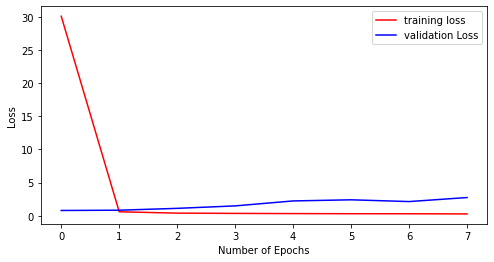

In [6]:
plt.figure(figsize=(8, 4))
plt.plot(range(8), history.history['loss'], 'r', label='training loss')
plt.plot(range(8), history.history['val_loss'], 'b', label='validation Loss')
plt.legend()
plt.xlabel('Number of Epochs')
plt.ylabel("Loss")
plt.show()

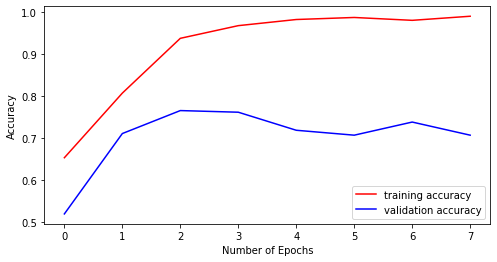

In [7]:
plt.figure(figsize=(8, 4))
plt.plot(range(8), history.history['accuracy'], 'r', label='training accuracy')
plt.plot(range(8), history.history['val_accuracy'], 'b', label='validation accuracy')
plt.legend()
plt.xlabel('Number of Epochs')
plt.ylabel("Accuracy")
plt.show()